In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">Load the two datasets MFCC_N.npy and MFCC_S.npy into arrays N and S respectively. </div>

In [2]:
N = np.load("MFCC_N.npy")
S = np.load("MFCC_S.npy")
N.shape, S.shape

((5000, 60), (5000, 60))

<div class="alert alert-block alert-success"> Display first 2 rows</div>

In [6]:
print(N[0:2,:])  

[[-3.07566538 -7.51789641 -1.37935714 -5.10237126  2.08754882  1.31936562
  -2.26597527  0.44171182  0.10342364  0.97412859 -2.0945179  -0.72570085
  -0.80634595 -0.41696267  1.74707401  0.50699389 -0.84961883  0.04409314
   0.28794684  0.98692331 -0.77543073 -0.11706155 -0.31751836  0.06868155
  -0.34602866 -0.22533624 -0.26578098 -0.27316525 -0.13921159 -0.07866713
   0.19517918  0.26899043  0.25200627 -0.06644347 -0.038682    0.39439319
   0.54706316  0.41512578  0.0212354  -0.4005713   0.45305646 -0.01472573
   0.22569126  0.14999071  0.1443918   0.09121043  0.06382645  0.10520884
   0.07921565  0.09016814 -0.07487464 -0.10307546 -0.04444551  0.06362546
   0.1072     -0.05684637 -0.14953161 -0.18227882 -0.12802416 -0.05514341]
 [-4.74620322 -8.24191711 -3.29561593 -5.90315392  1.20396831  1.08978258
  -2.75724548 -0.02303389 -0.36496559  0.26323142 -2.41580339 -1.00902027
  -0.4351764  -0.08643976  1.82597056  0.72989844 -0.49300274  0.90176935
   1.26220493  1.58233023 -0.77543073

In [ ]:
print(S[0:2,:])  

# Both N and S has 5000 rows and 60 columns (features)

 <div class="alert alert-block alert-success"> Compute centroids and covariance matrices of both arrays. </div>

In [30]:
# computing centroids
N_mu = np.mean(N,axis=0)
S_mu = np.mean(S,axis=0)
print(N_mu.shape,S_mu.shape)

(60,) (60,)


In [31]:
#computing covariance matrices for N
N_cov = np.cov(N.T,bias=True)
print(N_cov)
print(N_cov.shape)

[[ 7.36328318e+00  9.12825667e-01 -2.09692933e+00 ... -2.35485803e-02
  -1.06111732e-02 -1.05385573e-02]
 [ 9.12825667e-01  6.26668927e+00  1.03819961e+00 ... -1.46489418e-02
  -9.20937659e-03 -1.19340925e-02]
 [-2.09692933e+00  1.03819961e+00  3.71680854e+00 ...  4.22921180e-03
   7.12320570e-03  7.31721354e-04]
 ...
 [-2.35485803e-02 -1.46489418e-02  4.22921180e-03 ...  8.57118494e-03
   3.43451822e-03 -4.80165203e-04]
 [-1.06111732e-02 -9.20937659e-03  7.12320570e-03 ...  3.43451822e-03
   9.61437451e-03  4.47108941e-03]
 [-1.05385573e-02 -1.19340925e-02  7.31721354e-04 ... -4.80165203e-04
   4.47108941e-03  1.04567866e-02]]
(60, 60)


In [32]:
#computing covariance matrices for S
S_cov = np.cov(S.T,bias=True)
print(S_cov)
print(S_cov.shape)

[[ 4.01736216e+00 -3.52580907e-01 -2.47436682e+00 ...  1.32146829e-02
   2.80093879e-03  7.79533092e-03]
 [-3.52580907e-01  8.38273727e+00  2.09075455e+00 ...  3.06399366e-03
   5.82122824e-03 -4.33077523e-03]
 [-2.47436682e+00  2.09075455e+00  4.55956136e+00 ... -7.69574820e-03
   7.23632802e-04 -8.78047314e-03]
 ...
 [ 1.32146829e-02  3.06399366e-03 -7.69574820e-03 ...  4.12255230e-03
   1.00396102e-03  5.55505930e-04]
 [ 2.80093879e-03  5.82122824e-03  7.23632802e-04 ...  1.00396102e-03
   4.07463460e-03  7.38850939e-04]
 [ 7.79533092e-03 -4.33077523e-03 -8.78047314e-03 ...  5.55505930e-04
   7.38850939e-04  3.45810996e-03]]
(60, 60)


 <div class="alert alert-block alert-success"> computing mean differences. </div>

In [33]:
mudiff = N_mu - S_mu
print(mudiff.shape)
print(mudiff)

(60,)
[-4.45923232e+00 -3.65729738e+00  4.76601344e-01 -1.47662382e-01
  9.86056576e-01  8.63253847e-01 -1.10895030e-01  1.29301286e+00
  9.67180982e-03  5.12314729e-01  2.01196681e-01  9.78259570e-01
  9.37073642e-01  1.08921029e+00  1.39997784e+00  2.00373362e-01
  4.63597013e-01 -1.00081877e-01 -2.77994736e-01 -2.04197951e-01
  4.22232622e-02 -3.59961265e-03 -2.24473047e-02 -5.63046061e-03
 -1.66961120e-02 -1.30383817e-02 -9.40673739e-03 -8.04375519e-03
 -5.90600295e-03 -4.81343417e-04 -6.81117113e-03 -3.66669226e-03
 -1.27720955e-02 -5.32518210e-03 -1.01943459e-02  6.96689755e-03
  1.44532827e-02  2.22321495e-02  3.23762397e-02  1.64187135e-02
  3.62863347e-03 -2.04349647e-03 -5.16072559e-03 -3.64569261e-03
 -2.69312086e-03 -6.41943538e-04  1.26571014e-03 -1.45662338e-03
 -2.32103217e-03 -1.56668458e-03 -1.42773014e-03 -1.91111035e-03
 -7.43510103e-04  1.53577708e-03  1.36375902e-04  2.55359619e-03
  3.12785863e-03  1.63411126e-03  1.69485640e-04 -1.76920370e-03]


 <div class="alert alert-block alert-success"> Compute SW matix and SW inverse .</div>

In [34]:
Sw = N_cov + S_cov
print(Sw)
SW_inv = np.linalg.inv(Sw)
print(SW_inv.shape)

[[ 1.13806453e+01  5.60244760e-01 -4.57129615e+00 ... -1.03338974e-02
  -7.81023444e-03 -2.74322634e-03]
 [ 5.60244760e-01  1.46494265e+01  3.12895416e+00 ... -1.15849482e-02
  -3.38814836e-03 -1.62648677e-02]
 [-4.57129615e+00  3.12895416e+00  8.27636990e+00 ... -3.46653640e-03
   7.84683850e-03 -8.04875178e-03]
 ...
 [-1.03338974e-02 -1.15849482e-02 -3.46653640e-03 ...  1.26937372e-02
   4.43847924e-03  7.53407268e-05]
 [-7.81023444e-03 -3.38814836e-03  7.84683850e-03 ...  4.43847924e-03
   1.36890091e-02  5.20994035e-03]
 [-2.74322634e-03 -1.62648677e-02 -8.04875178e-03 ...  7.53407268e-05
   5.20994035e-03  1.39148966e-02]]
(60, 60)


 <div class="alert alert-block alert-success"> Compute the optimal direction vector m^ (unit vector) for LDA.</div>

In [35]:
u = SW_inv @ mudiff
Wcap = u / np.linalg.norm(u)  # unit vector for LDA

print(Wcap.shape)

(60,)


 <div class="alert alert-block alert-success"> Project the vector data in arrays N and S to generate the respective array of scalars zN and zS.</div>

In [36]:
zN = N @ Wcap.T
zS = S @ Wcap.T

print(zN.shape, zS.shape)

(5000,) (5000,)


 <div class="alert alert-block alert-success">Plot the normalized histograms of zN and zS in two different colors.</div>

(array([  30.,  200.,  909., 1770., 1305.,  538.,  190.,   46.,    9.,
           3.]),
 array([-0.6741668 , -0.57015844, -0.46615008, -0.36214172, -0.25813336,
        -0.154125  , -0.05011664,  0.05389172,  0.15790008,  0.26190844,
         0.3659168 ]),
 <BarContainer object of 10 artists>)

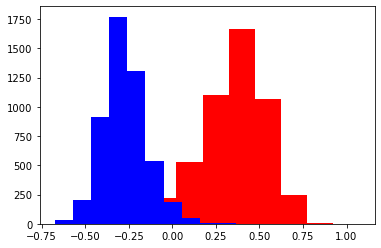

In [37]:
plt.hist(zN,color='r')
plt.hist(zS,color='b')

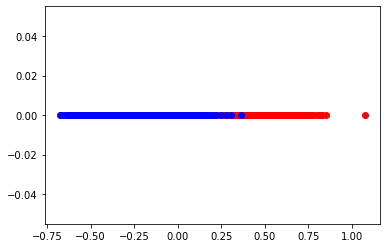

In [38]:
plt.scatter(zN,np.zeros(5000),c='r')
plt.scatter(zS,np.zeros(5000),c='b')